In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, functions as f
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
import pandas as pd
import sqlalchemy as db
import mysql.connector


spark = SparkSession.builder.appName("hockey").config("spark.some.config.option", "some-value").getOrCreate()

df = pd.read_csv("sportTweets.csv")

# specify database configurations
db_connection = mysql.connector.connect(host = 'database',
                                        port = 3306, 
                                        user = 'symfony', 
                                        passwd = 'symfony', 
                                        db = 'symfony_docker')

# create and use a new database
db_cursor = db_connection.cursor()
db_cursor.execute("USE symfony_docker;")

#db_cursor.execute("CREATE TABLE Statistics(year YEAR, count INT);")



sparkDF = spark.createDataFrame(df)
tweets_2021 = sparkDF.filter(sparkDF['Date'] >= '2021-01-01')
tweets_2020 = sparkDF.filter((sparkDF['Date']>='2020-01-01') & (sparkDF['Date']<='2020-12-31'))
tweets_2019 = sparkDF.filter((sparkDF['Date']>='2019-01-01') & (sparkDF['Date']<='2019-12-31'))

num_of_hockey_tweets_2021 = tweets_2021.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()
num_of_hockey_tweets_2020 = tweets_2020.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()
num_of_hockey_tweets_2019 = tweets_2019.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()

columns = ['Period', 'Count']
data = [('2019', num_of_hockey_tweets_2019),('2020', num_of_hockey_tweets_2020),('2021', num_of_hockey_tweets_2021)]

sql = "INSERT INTO Statistics(year,count) VALUES(%s, %s)"
# Create a new record
db_cursor.executemany(sql,data)

# connection is not autocommit by default. So we must commit to save our changes.
db_connection.commit()

#rdd = spark.createDataFrame(data).toDF(*columns)
#rdd.toPandas().to_csv('numOfHockeyTweets19-21.csv')

In [2]:
pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 10.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


+-----------+-----+
|      words|count|
+-----------+-----+
|      https|  275|
|     hockey|  201|
|      women|   82|
|      tokyo|   81|
|      watch|   68|
|bbcolympics|   60|
|      great|   51|
|    britain|   49|
|      their|   47|
|     teamgb|   43|
+-----------+-----+



Text(0.5, 0, 'Count of words')

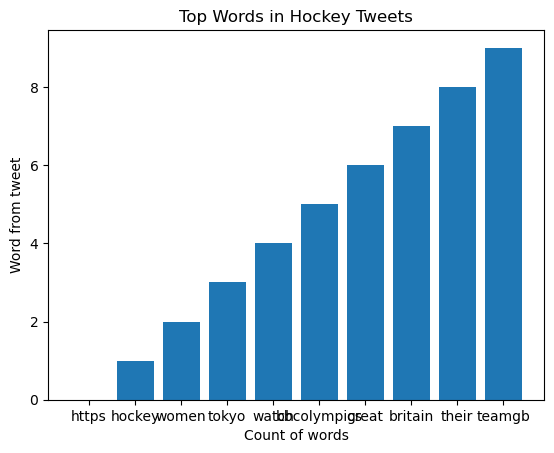

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

wordsHockeyTweets = sparkDF.selectExpr("lower(Tweet) as lowerTweets")\
.withColumn("cleaned", f.regexp_replace(f.col("lowerTweets"), "[^a-z |*]", "  "))\
.filter(col("cleaned").contains("hockey"))\
.select("*", f.expr("split(cleaned, ' ') splitted"))\
.select(f.explode(f.col("splitted")).alias("words"))\
.where("length(words)>4")\
.groupBy("words").count()\
.orderBy(f.desc("count")).limit(10)
wordsHockeyTweets.show()

y = wordsHockeyTweets.toPandas()["words"].values.tolist()
x = wordsHockeyTweets.toPandas()["count"].index.tolist()
#plt.bar(x, y)
plt.title('Top Words in Hockey Tweets')
plt.ylabel('Word from tweet', fontsize = 10)
plt.xlabel('Count of words', fontsize = 10)
#plt.show()

#wordsHockeyTweets = wordsHockeyTweets.iloc[:20,]
#plt.figure(figsize=(10,5))
#sns.barplot(wordsHockeyTweets.values, wordsHockeyTweets.index, alpha=0.8)
#plt.title('Top Words in Hockey Tweets')
#plt.ylabel('Word from tweet', fontsize = 12)
#plt.xlabel('Count of words', fontsize = 12)
#plt.show()

#Creating Visualization
#fig = plt.pie(wordsInHockeyTweets['words'], autopct='%1.1f%%', startangle=140,labels=wordsInHockeyTweets['words'])
#plt.title('Visualization of words')
#plt.show()

In [ ]:

config = {
    'host': 'localhost',
    'port': 3306,
    'user': 'symfony',
    'password': 'symfony',
    'database': 'symfony_docker'
}
db_user = config.get('user')
db_pwd = config.get('password')
db_host = config.get('host')
db_port = config.get('port')
db_name = config.get('database')
# specify connection string
connection_str = f'mysql+pymysql://{db_user}:{db_pwd}@{db_host}:{db_port}/{db_name}'
# connect to database
engine = db.create_engine(connection_str)
connection = engine.connect()

# Convert Pandas dataframe to spark DataFrame
df = spark.createDataFrame(pdf)

df.show()